In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set_adm = test_datagen.flow_from_directory('C:/Users/HP/OneDrive/Desktop/archive (2)/ADM/test',
                                            target_size = (128,128),
                                            batch_size = 32,
                                            class_mode = 'categorical')
test_set_catoract = test_datagen.flow_from_directory('C:/Users/HP/OneDrive/Desktop/archive (2)/catoract/test',
                                            target_size = (128,128),
                                            batch_size = 32,
                                            class_mode = 'categorical')
test_set_dr = test_datagen.flow_from_directory('C:/Users/HP/OneDrive/Desktop/archive (2)/dr/test',
                                            target_size = (128,128),
                                            batch_size = 32,
                                            class_mode = 'categorical')
test_set_glancoma = test_datagen.flow_from_directory('C:/Users/HP/OneDrive/Desktop/archive (2)/glancoma/test',
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'categorical')
test_set_hyper = test_datagen.flow_from_directory('C:/Users/HP/OneDrive/Desktop/archive (2)/hypertensive/test',
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'categorical')
test_set_myopia = test_datagen.flow_from_directory('C:/Users/HP/OneDrive/Desktop/archive (2)/myopia/test',
                                            target_size = (128,128),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 256 images belonging to 3 classes.
Found 291 images belonging to 2 classes.
Found 695 images belonging to 5 classes.
Found 335 images belonging to 2 classes.
Found 273 images belonging to 2 classes.
Found 281 images belonging to 2 classes.


In [3]:
model_adm     =tf.keras.models.load_model('AMD.h5')
model_dr      =tf.keras.models.load_model('DR.h5')
model_catorat =tf.keras.models.load_model('catoract.h5')
model_glancoma=tf.keras.models.load_model('glancoma.h5')
model_hyper   =tf.keras.models.load_model('Hyper.h5')
model_myopia  =tf.keras.models.load_model('myopia.h5')

In [4]:
acc_list={"Hypertensive":model_hyper.evaluate(test_set_hyper)[1],
          "ADM":model_adm.evaluate(test_set_adm)[1],
          "Catoract":model_catorat.evaluate(test_set_catoract)[1],
          "Glancoma":model_glancoma.evaluate(test_set_glancoma)[1],
          "Myopia":model_myopia.evaluate(test_set_myopia)[1],
          "DR":model_dr.evaluate(test_set_dr)[1]
         }

22/22 [==============================] - 21s 919ms/step - loss: 0.6279 - accuracy: 0.7237


In [5]:
for i in acc_list:
    acc_list[i]*=100

In [6]:
acc_list

{'Hypertensive': 95.9706962108612,
 'ADM': 91.015625,
 'Catoract': 96.2199330329895,
 'Glancoma': 94.62686777114868,
 'Myopia': 95.72953581809998,
 'DR': 72.37409949302673}

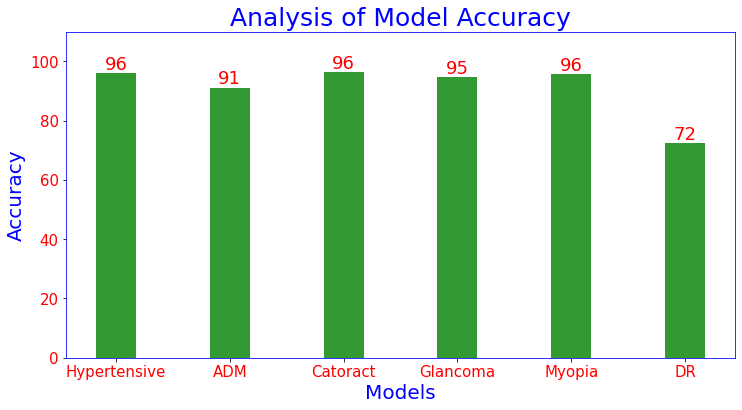

In [7]:
x=[]
y=[]
for i in acc_list:
    x.append(i)
    y.append(acc_list[i])  
plt.figure(figsize=(12,6)) 
plt.rcParams['axes.edgecolor']='b'
plt.ylabel('Accuracy',fontsize=20).set_color('b')
plt.xlabel('Models',fontsize=20).set_color('b')
plt.title('Analysis of Model Accuracy',fontsize=25).set_color('b')
plt.xticks(range(len(x)),x,color='red',fontsize=15)
plt.yticks(color='red',fontsize=15)
plt.ylim([0,110])
bar1=plt.bar(np.arange(len(x)),y,0.35,align='center',alpha=0.8,color='g')
for t in bar1:
    height=t.get_height()
    plt.text(t.get_x()+t.get_width()/2.0,height,f'{height:.0f}',ha='center',va='bottom',color='red',fontsize=18)    
plt.show()

In [8]:
test_set_adm.class_indices

{'1.Dry AMD': 0, '11.Normal Fundus': 1, '2.Wet AMD': 2}

In [9]:
test_set_dr.class_indices

{'11.Normal Fundus': 0,
 '3.Mild DR': 1,
 '4.Moderate DR': 2,
 '5.Severe DR': 3,
 '6.Proliferate DR': 4}

In [10]:
test_set_catoract.class_indices

{'11.Normal Fundus': 0, '7.Cataract': 1}

In [11]:
test_set_glancoma.class_indices

{'10.Glaucoma': 0, '11.Normal Fundus': 1}

In [12]:
test_set_hyper.class_indices

{'11.Normal Fundus': 0, '8.Hypertensive Retinopathy': 1}

In [13]:
test_set_myopia.class_indices

{'11.Normal Fundus': 0, '9.Pathological Myopia': 1}